<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
Projet 7 :<br><br>
Réalisez des indexations automatiques d’images<br><br>
</p><br>

* **Data Source / Data Source :** 
    - Data :
    - Source : https://github.com/EricJacquesPro/AutomaticImageIndexing
    - Libraries : openCv 2.4.11
* **Description / Description : ** Projet 7 de la formation Data Scientist Proposée par OpenClassroom
    - Analyse
    - Entrainement
* **Auteur / Author : ** Eric JACQUES 
* **Date : ** 21/01/2020 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I - Data</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I.1 - Source</p>

images + description au format xml

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I.2 - Preparation des données</p>

In [2]:
from matplotlib import pyplot as plt

import os
import sys

sys.path.insert(0, './')

In [3]:
# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing

In [4]:
# class de travail
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

0.2
Data/


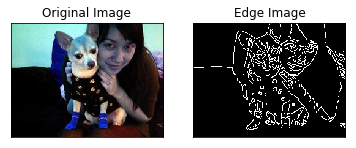

In [4]:
#try cannis algorythm
#imgage path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'

image, edges = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

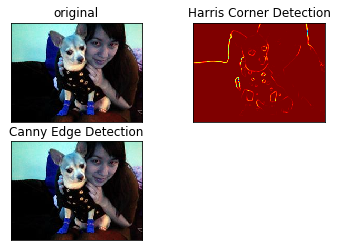

In [5]:
#try stefen harris algorythm
#imgage path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'

original, image_cornered, corners, corners2 = automaticImageIndexing.stefen_harris(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    canny=False
)

plt.subplot(221),plt.imshow(image)
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(corners ,cmap = 'jet')
plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(image_cornered,cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I.3 - Extraction des features</p>

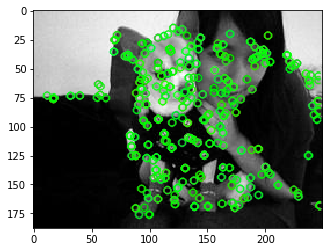

(<matplotlib.image.AxesImage at 0x10f2d908>, None)

In [9]:
#try sift
#imgage path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
image = automaticImageIndexing.read_image(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    crop=False
)
original, image_sifted = automaticImageIndexing.feature_sift_extration(image, False)

plt.imshow(image_sifted),plt.show()

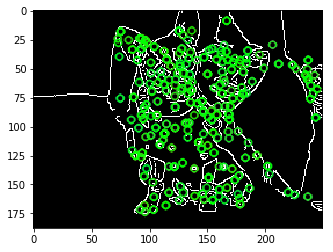

(<matplotlib.image.AxesImage at 0x135e89b0>, None)

In [10]:
image, edges = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
original, image_canny = automaticImageIndexing.feature_sift_extration(edges, True)

plt.imshow(image_canny),plt.show()


In [11]:
image1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image2, edges2 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_199.jpg'
)
match_img = automaticImageIndexing.feature_sift(edges1, edges2, True)

plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()

ValueError: too many values to unpack

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


error: ..\..\..\..\opencv\modules\nonfree\src\sift.cpp:722: error: (-5) image is empty or has incorrect depth (!=CV_8U) in function cv::SIFT::operator ()


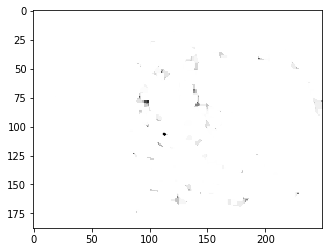

In [8]:
original, image_cornered, corners, corners2 = automaticImageIndexing.stefen_harris(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    canny=True
)

plt.imshow(corners2,cmap = 'gray')
print(corners2)

original, image_st_h = automaticImageIndexing.feature_extration_sift(corners2, True)

plt.imshow(image_st_h),plt.show()


In [12]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

def orbnav(inDir):
    result = None
    orb = cv2.ORB()
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    img1, kp1, des1 = None, None, None
    for name in os.listdir(inDir):
        print name
        img2 = cv2.imread( os.path.join(inDir, name) )
        kp2, des2 = orb.detectAndCompute(img2, None)
        print len(kp2)
        if img1 is not None:
            matches = bf.match(des1,des2)
            matches = sorted(matches, key = lambda x:x.distance)
            gray1 = cv2.cvtColor( img1, cv2.COLOR_BGR2GRAY )
            gray2 = cv2.cvtColor( img2, cv2.COLOR_BGR2GRAY )
            img3 = cv2.drawMatches(
                                    gray1,kp1,
                                    gray2,kp2,
                                    matches[:N_MATCHES]
                                  )
            cv2.imwrite( "tmp.jpg", img3 )
        img1, kp1, des1 = img2, kp2, des2 

orbnav('C://Users//naru_//OneDrive//Documents//openclassroom//P7 traitement image//images//n02085620-Chihuahua//')

n02085620_10074.jpg
500
n02085620_10131.jpg
500


AttributeError: 'module' object has no attribute 'drawMatches'

In [13]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

def orbnav(inDir):
    result = None
    orb = cv2.ORB()
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    img1, kp1, des1 = None, None, None
    for name in os.listdir(inDir)[0:1]:
        print name
        image = cv2.imread( os.path.join(inDir, name) )
        kp2, des2 = orb.detectAndCompute(image, None)        
        sub_pictures = cv2.drawKeypoints(image, kp2, color=(0, 0, 255))
        print len(kp2)
        print len(sub_pictures)
        print(sub_pictures[0:1])
        return sub_pictures[0:1]
imsu = orbnav('C://Users//naru_//OneDrive//Documents//openclassroom//P7 traitement image//images//n02085620-Chihuahua//')

n02085620_10074.jpg
500
500
[[[ 14   9  11]
  [ 13   8  10]
  [ 11   6   7]
  [ 10   6   5]
  [  7   5   4]
  [  8   7   3]
  [  9   8   4]
  [ 10   9   5]
  [ 14  15  11]
  [  0   1   0]
  [  9  10   8]
  [ 17  18  16]
  [  4   6   7]
  [  5   7   8]
  [ 14  15  19]
  [  8  11  16]
  [  3   4  18]
  [ 27  30  45]
  [ 49  52  67]
  [ 53  56  71]
  [ 52  55  70]
  [ 56  59  74]
  [ 57  60  75]
  [ 52  55  70]
  [ 53  56  71]
  [ 52  55  70]
  [ 51  54  69]
  [ 49  52  67]
  [ 47  50  65]
  [ 45  48  63]
  [ 44  47  62]
  [ 41  46  61]
  [ 40  45  60]
  [ 37  44  59]
  [ 35  42  57]
  [ 33  40  55]
  [ 31  38  53]
  [ 30  37  52]
  [ 30  37  52]
  [ 29  36  51]
  [ 28  35  50]
  [ 28  35  50]
  [ 27  34  49]
  [ 26  33  48]
  [ 24  31  46]
  [ 23  30  45]
  [ 22  29  44]
  [ 22  29  44]
  [ 21  30  44]
  [ 21  30  44]
  [ 21  30  44]
  [ 20  29  43]
  [ 20  29  43]
  [ 19  28  42]
  [ 20  27  42]
  [ 20  27  42]
  [ 23  28  43]
  [ 21  26  41]
  [ 19  24  39]
  [ 20  25  40]
  [ 24  27  

In [14]:
cv2.imshow('res', imsu)

In [15]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

image1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image2, edges2 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_199.jpg'
)
match_img = automaticImageIndexing.feature_sift_knn(edges1, edges2, True)
print(match_img)
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

0.2
Data/


ValueError: too many values to unpack

In [ ]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
img2, edges2 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_199.jpg'
)
image1 = edges1
image2 = edges2
print('apres canny')
is_gray = True
image1_kp, image1_desc, sub_pictures1 = automaticImageIndexing.feature_sift_generation(image1, is_gray)
image2_kp, image2_desc, sub_pictures2 = automaticImageIndexing.feature_sift_generation(image2, is_gray)
print('apres feature_sift_generation')
# Create matcher
#bf = self.cv.BFMatcher(self.cv.NORM_L2, crossCheck=True)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
# Perform KNN matching
#matches = bf.knnMatch(image1_desc, image2_desc, k=2)
matches = bf.knnMatch(np.asarray(image1_desc, np.float32), np.asarray(image2_desc, np.float32), k=2)
print('apres Knn')
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.90*n.distance:
        # Add first matched keypoint to list
        # if ratio test passes
        good.append(m)
print('apres filtre distance knn')
# Or do a list comprehension
#good = [m for (m,n) in matches if m.distance < 0.75*n.distance]

# Now perform drawMatches
match_img = automaticImageIndexing.drawMatches(image1, image1_kp, image2, image2_kp, good)
print('apres drawMatches')
print(match_img)
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

0.2
Data/
apres canny
apres feature_sift_generation
apres Knn
apres filtre distance knn


In [ ]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    False
)
image1 = edges1

(h, w) = img1.shape[:2]
center = (w / 2, h / 2)

M = cv.getRotationMatrix2D(center, 90, 1.0)
image2 = cv.warpAffine(edges1, M, (h, w))

print('apres canny')
is_gray = True
image1_kp, image1_desc = automaticImageIndexing.feature_sift_generation(image1, is_gray)
image2_kp, image2_desc = automaticImageIndexing.feature_sift_generation(image2, is_gray)
print('apres feature_sift_generation')
# Create matcher
#bf = self.cv.BFMatcher(self.cv.NORM_L2, crossCheck=True)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
# Perform KNN matching
#matches = bf.knnMatch(image1_desc, image2_desc, k=2)
matches = bf.knnMatch(np.asarray(image1_desc, np.float32), np.asarray(image2_desc, np.float32), k=2)
print('apres Knn')
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.90*n.distance:
        # Add first matched keypoint to list
        # if ratio test passes
        good.append(m)
print('apres filtre distance knn')
# Or do a list comprehension
#good = [m for (m,n) in matches if m.distance < 0.75*n.distance]

# Now perform drawMatches
match_img = automaticImageIndexing.drawMatches(image1, image1_kp, image2, image2_kp, good)
print('apres drawMatches')
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

In [ ]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image1 = edges1

(h, w) = img1.shape[:2]
center = (w / 2, h / 2)

M = cv.getRotationMatrix2D(center, 90, 1.2)
image2 = cv.warpAffine(edges1, M, (h, w))

print('apres canny')
is_gray = True
image1_kp, image1_desc = automaticImageIndexing.feature_sift_generation(image1, is_gray)
image2_kp, image2_desc = automaticImageIndexing.feature_sift_generation(image2, is_gray)
print('apres feature_sift_generation')
# Create matcher
#bf = self.cv.BFMatcher(self.cv.NORM_L2, crossCheck=True)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
# Perform KNN matching
#matches = bf.knnMatch(image1_desc, image2_desc, k=2)
matches = bf.knnMatch(np.asarray(image1_desc, np.float32), np.asarray(image2_desc, np.float32), k=2)
print('apres Knn')
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.90*n.distance:
        # Add first matched keypoint to list
        # if ratio test passes
        good.append(m)
print('apres filtre distance knn')
# Or do a list comprehension
#good = [m for (m,n) in matches if m.distance < 0.75*n.distance]

# Now perform drawMatches
match_img = automaticImageIndexing.drawMatches(image1, image1_kp, image2, image2_kp, good)
print('apres drawMatches')
print(match_img)
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

In [ ]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image1 = edges1

(h, w) = img1.shape[:2]
center = (w / 3, h / 3)

M = cv.getRotationMatrix2D(center, 0, 0.8)
image2 = cv.warpAffine(edges1, M, (h, w))

print('apres canny')
is_gray = True
image1_kp, image1_desc = automaticImageIndexing.feature_sift_generation(image1, is_gray)
image2_kp, image2_desc = automaticImageIndexing.feature_sift_generation(image2, is_gray)
print('apres feature_sift_generation')
# Create matcher
#bf = self.cv.BFMatcher(self.cv.NORM_L2, crossCheck=True)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
# Perform KNN matching
#matches = bf.knnMatch(image1_desc, image2_desc, k=2)
matches = bf.knnMatch(np.asarray(image1_desc, np.float32), np.asarray(image2_desc, np.float32), k=2)
print('apres Knn')
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.90*n.distance:
        # Add first matched keypoint to list
        # if ratio test passes
        good.append(m)
print('apres filtre distance knn')
# Or do a list comprehension
#good = [m for (m,n) in matches if m.distance < 0.75*n.distance]

# Now perform drawMatches
match_img = automaticImageIndexing.drawMatches(image1, image1_kp, image2, image2_kp, good)
print('apres drawMatches')
print(match_img)
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

In [ ]:


'''
X = []
for i in range(N):
    im = imread('image_i')
    X.append(im[0:100,0:100].copy()) 
'''

from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image1 = edges1

image2 = edges1[1:180,71:192].copy()

print('apres canny')
is_gray = True
image1_kp, image1_desc = automaticImageIndexing.feature_sift_generation(image1, is_gray)
image2_kp, image2_desc = automaticImageIndexing.feature_sift_generation(image2, is_gray)
print('apres feature_sift_generation')
# Create matcher
#bf = self.cv.BFMatcher(self.cv.NORM_L2, crossCheck=True)

bf = cv.BFMatcher(normType=cv.NORM_L2, crossCheck=False)
# Perform KNN matching
#matches = bf.knnMatch(image1_desc, image2_desc, k=2)
matches = bf.knnMatch(np.asarray(image1_desc, np.float32), np.asarray(image2_desc, np.float32), k=2)
print('apres Knn')
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.90*n.distance:
        # Add first matched keypoint to list
        # if ratio test passes
        good.append(m)
print('apres filtre distance knn')
# Or do a list comprehension
#good = [m for (m,n) in matches if m.distance < 0.75*n.distance]

# Now perform drawMatches
match_img = automaticImageIndexing.drawMatches(image1, image1_kp, image2, image2_kp, good)
print('apres drawMatches')
print(match_img)
plt.figure(figsize=(12,6))
plt.imshow(match_img),plt.show()
print('End')

0.0
Data/


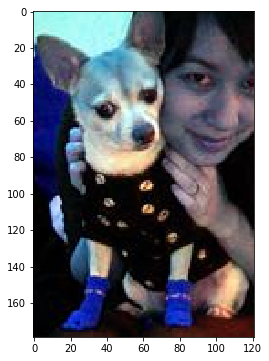

End


In [2]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1 = automaticImageIndexing.read_image(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    crop = True
)
plt.figure(figsize=(12,6))
plt.imshow(img1),plt.show()
print('End')

0.0
Data/


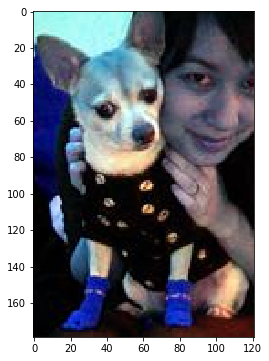

End


In [2]:
from matplotlib import pyplot as plt

import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1 = automaticImageIndexing.read_crop_image(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg',
    xmin = 71,
    ymin = 1, 
    xmax=192, 
    ymax=180
)
plt.figure(figsize=(12,6))
plt.imshow(img1),plt.show()
print('End')



In [9]:
import xml.etree.ElementTree as ET
tree = ET.parse('C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/annotation/n02085620-Chihuahua/n02085620_7')
root = tree.getroot()

# one specific item attribute
print('Item #2 attribute:')
print(root[5])

Item #2 attribute:
<Element 'object' at 0x8c40908>


0.0
Data/


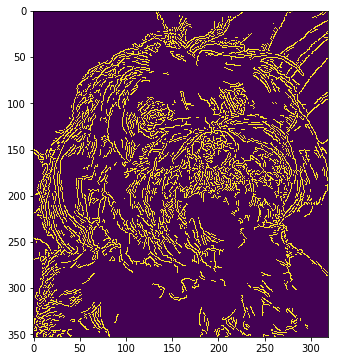

End


In [4]:

def read_picture_from_annotation_file(picture_path, items):
    # total amount of items
    #bndbox = items[0].getElementsByTagName('bndbox')
    images=[]
    name=''
    for element in items:
        dog_specie = element.getElementsByTagName('name')[0].firstChild.nodeValue
        bndboxs = element.getElementsByTagName('bndbox')
        for bndbox in bndboxs:
            row = []
            image = read_picture_from_annotation_bndbox(picture_path, bndbox)
            edges = automaticImageIndexing.canny_from_image(image)
            row.append(edges)
            row.append(dog_specie)
            images.append(row)
    return images

def read_picture_from_annotation_bndbox(picture_path, bndbox):
    xmin = bndbox.getElementsByTagName('xmin')[0].firstChild.nodeValue
    ymin = bndbox.getElementsByTagName('ymin')[0].firstChild.nodeValue
    xmax = bndbox.getElementsByTagName('xmax')[0].firstChild.nodeValue
    ymax = bndbox.getElementsByTagName('ymax')[0].firstChild.nodeValue

    image = read_crop_image(
        image_path=picture_path,
        xmin=int(xmin),
        ymin=int(ymin), 
        xmax=int(xmax), 
        ymax=int(ymax)
    )
    return image

def read_crop_image(image_path, xmin, xmax, ymin, ymax):
    '''
    read image with open cv
    '''
    if os.path.exists(image_path):
        image = cv.imread(image_path)
        image = image[ymin: ymax, xmin: xmax].copy()
        return image
    print('no image found')
    return None;

from matplotlib import pyplot as plt

import os
import os.path
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from xml.dom import minidom

sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

working_directory = 'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/'
annotation_directory = 'annotation/'
picture_directory = 'images/'
picture_extension = '.jpg'
slash = "/"

picture_list = []
folder_list = os.listdir(''.join([working_directory,annotation_directory]))
for folder in folder_list:
    anotation_directory_path = ''.join([working_directory,annotation_directory,folder])
    picture_directory_path = ''.join([working_directory,picture_directory,folder])
    doc_list = os.listdir(anotation_directory_path)[0:2]# a retrier pour le trairement complet
    for doc in doc_list:
        picture_path = ''.join([picture_directory_path,slash,doc,picture_extension])
        anotation_doc = minidom.parse(''.join([anotation_directory_path,slash,doc]))
        items = anotation_doc.getElementsByTagName('object')
        image_list = read_picture_from_annotation_file(picture_path, items)
        picture_list = picture_list + image_list

plt.figure(figsize=(12,6))
plt.imshow(picture_list[4][0]),plt.show()
print('End')




In [12]:
import numpy as np
import cv2

img = cv2.imread('C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'reshape'

In [13]:
from sklearn.cluster import MiniBatchKMeans


In [14]:
descriptors = np.array([])

kp, des = cv2.SIFT().detectAndCompute('C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg', None)
descriptors = np.append(descriptors, des)

desc = np.reshape(descriptors, (len(descriptors)/128, 128))
Z = np.float32(desc)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()


TypeError: image is not a numpy array, neither a scalar

In [ ]:
from matplotlib import pyplot as plt

import os
import os.path
import sys
import numpy as np
import matplotlib.pyplot as plt

from xml.dom import minidom

sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(''.join(['Version : ', automaticImageIndexing.version()]))
print(''.join(['Data directory : ', automaticImageIndexing.data_directory]))

working_directory = 'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/'
annotation_directory = 'annotation/'
picture_directory = 'images/'
picture_extension = '.jpg'
slash = "/"

picture_list = []
folder_list = os.listdir(''.join([working_directory,annotation_directory]))
for folder in folder_list:
    anotation_directory_path = ''.join([working_directory,annotation_directory,folder])
    picture_directory_path = ''.join([working_directory,picture_directory,folder])
    doc_list = os.listdir(anotation_directory_path)[0:2]# a retrier pour le trairement complet
    for doc in doc_list:
        picture_path = ''.join([picture_directory_path,slash,doc,picture_extension])
        anotation_doc = minidom.parse(''.join([anotation_directory_path,slash,doc]))
        items = anotation_doc.getElementsByTagName('object')
        image_list = automaticImageIndexing.read_picture_from_annotation_file(picture_path, items)
        picture_list = picture_list + image_list
''''
plt.figure(figsize=(12,6))
plt.imshow(picture_list[4][0]),plt.show()
'''

In [18]:

plt.imshow(picture_list[4][0]),plt.show()

NameError: name 'plt' is not defined

In [17]:
import cv2
import numpy as np
import progressbar
from sklearn.cluster import MiniBatchKMeans

def build_dictionary(shift, dir_names, file_paths, dictionary_size):
    print('Computing descriptors..')        
    desc_list = []
    num_files = len(file_paths)
    bar = progressbar.ProgressBar(maxval=num_files).start()
    for i in range(num_files):
        p = file_paths[i]
        print(p)
        image = cv2.imread(p)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kp, desc = sift.detectAndCompute(gray,None)
        desc_list.extend(desc)
        bar.update(i)
    bar.finish()
    print('Creating BoW dictionary using K-Means clustering with k={}..'.format(dictionary_size))
    dictionary = MiniBatchKMeans(n_clusters=dictionary_size, batch_size=100, verbose=1)
    dictionary.fit(np.array(desc_list))
    return dictionary

# usage example
#sift = cv2.xfeatures2d.SIFT_create()
sift=cv2.SIFT()
dir_names = ['class1', 'class2']
file_paths = ['C:\\Users\\naru_\\OneDrive\\Documents\\openclassroom\\P7 traitement image\\images\\n02085620-Chihuahua\\n02085620_7.jpg',
              'C:\\Users\\naru_\\OneDrive\\Documents\\openclassroom\\P7 traitement image\\images\\n02085620-Chihuahua\\n02085620_199.jpg'
             ]
dictionary_size = 2#2800
dictionary = build_dictionary(sift, dir_names, file_paths, dictionary_size)

Computing descriptors..
C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg
C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_199.jpg
Creating BoW dictionary using K-Means clustering with k=2..
Init 1/3 with method: k-means++
Inertia for init 1/3: 40318380.000000
Init 2/3 with method: k-means++
Inertia for init 2/3: 40040332.000000
Init 3/3 with method: k-means++
Inertia for init 3/3: 40707820.000000
Minibatch iteration 1/1200: mean batch inertia: 133502.850000, ewa inertia: 133502.850000 
Minibatch iteration 2/1200: mean batch inertia: 133952.890000, ewa inertia: 133581.735188 
Minibatch iteration 3/1200: mean batch inertia: 136434.330000, ewa inertia: 134081.751807 
Minibatch iteration 4/1200: mean batch inertia: 135576.670000, ewa inertia: 134343.788300 
Minibatch iteration 5/1200: mean batch inertia: 133604.660000, ewa inertia: 134214.230316 
Minibatch iteration 6/1200:

100% |########################################################################|


Minibatch iteration 12/1200: mean batch inertia: 135302.500000, ewa inertia: 133221.550377 
Minibatch iteration 13/1200: mean batch inertia: 130207.840000, ewa inertia: 132693.292642 
Minibatch iteration 14/1200: mean batch inertia: 134204.720000, ewa inertia: 132958.222941 
Minibatch iteration 15/1200: mean batch inertia: 131737.570000, ewa inertia: 132744.260989 
Minibatch iteration 16/1200: mean batch inertia: 131961.610000, ewa inertia: 132607.074137 
Minibatch iteration 17/1200: mean batch inertia: 132122.020000, ewa inertia: 132522.051501 
Minibatch iteration 18/1200: mean batch inertia: 132568.070000, ewa inertia: 132530.117846 
Minibatch iteration 19/1200: mean batch inertia: 129861.300000, ewa inertia: 132062.314543 
Minibatch iteration 20/1200: mean batch inertia: 129593.330000, ewa inertia: 131629.538988 
Minibatch iteration 21/1200: mean batch inertia: 130917.260000, ewa inertia: 131504.687281 
Minibatch iteration 22/1200: mean batch inertia: 134159.050000, ewa inertia: 131

In [89]:
from matplotlib import pyplot as plt

import cv2
import progressbar
from sklearn.cluster import MiniBatchKMeans

import os
import os.path
import sys
import numpy as np
import matplotlib.pyplot as plt

from xml.dom import minidom

train_labels = np.array([])
name_dict = {}
label_count = 0

sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(''.join(['Version : ', automaticImageIndexing.version()]))
print(''.join(['Data directory : ', automaticImageIndexing.data_directory]))

working_directory = 'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/'
annotation_directory = 'annotation/'
picture_directory = 'images/'
picture_extension = '.jpg'
slash = "/"

picture_list = []
desc_list = []

sift=cv2.SIFT()
folder_list = os.listdir(''.join([working_directory,annotation_directory]))
for folder in folder_list[0:4]:# a retrier pour le traitement complet
    name_dict[label_count] = folder
    label_count = label_count + 1
    print "Computing Features for ", folder
    anotation_directory_path = ''.join([working_directory,annotation_directory,folder])
    picture_directory_path = ''.join([working_directory,picture_directory,folder])
    doc_list = os.listdir(anotation_directory_path)[0:2]# a retrier pour le traitement complet
    for doc in doc_list:
        picture_path = ''.join([picture_directory_path,slash,doc,picture_extension])
        anotation_doc = minidom.parse(''.join([anotation_directory_path,slash,doc]))
        items = anotation_doc.getElementsByTagName('object')
        desc_list = desc_list + automaticImageIndexing.read_descriptor_picture_from_annotation_file(picture_path, items)
dictionary_size = len(desc_list)


Version : 0.0
Data directory : Data/
Computing Features for  n02085620-Chihuahua
apres canny
apres canny
Computing Features for  n02085782-Japanese_spaniel
apres canny
apres canny
Computing Features for  n02085936-Maltese_dog
apres canny
apres canny
Computing Features for  n02086079-Pekinese
apres canny
apres canny


In [3]:

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

    
def clusturing(n_clusters, descriptor_list):
    kmeans_obj = KMeans(n_clusters = n_clusters)
    kmeans_ret = kmeans_obj.fit_predict(np.array(descriptor_list))
    return kmeans_ret, kmeans_obj

def developVocabulary(n_images, descriptor_list, kmeans_ret):
    mega_histogram = np.array([np.zeros(n_clusters) for i in range(n_images)])
    old_count = 0
    for i in range(n_images):
        l = len(descriptor_list[i])
        for j in range(l):
            idx = kmeans_ret[old_count+j]
            mega_histogram[i][idx] += 1
        old_count += l
    print "Vocabulary Histogram Generated"
    return mega_histogram
#représenter 1 cluster pour voir l'homogénéité?
#=>représentation des descriptor du cluster

def plotHist(mega_histogram, n_clusters, vocabulary = None):
    print "Plotting histogram"
    if vocabulary is None:
        vocabulary = mega_histogram
    
    x_scalar = np.arange(n_clusters)
    y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(n_clusters)])
    
    print y_scalar
    
    plt.bar(x_scalar, y_scalar)
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar + 0.4, x_scalar)
    plt.show()
    
def standardize(mega_histogram, std=None):
    """

    standardize is required to normalize the distribution
    wrt sample size and features. If not normalized, the classifier may become
    biased due to steep variances.
    """
    if std is None:
        scale = StandardScaler().fit(mega_histogram)
        mega_histogram = scale.transform(mega_histogram)
    else:
        print "STD not none. External STD supplied"
        mega_histogram = std.transform(mega_histogram)
    return mega_histogram

def train(clf, mega_histogram, train_labels):
    """
    uses sklearn.svm.SVC classifier (SVM) 
    """
    print "Training SVM"
    print clf
    print "Train labels", train_labels
    clf.fit(mega_histogram, train_labels)
    print "Training completed"


In [83]:
desc_list

[array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   1., 134.,   2.,   0.,
          0.,   0.,   0.,   3.,  28., 174.,  22.,   1.,   5.,   6.,   0.,
          0.,  22.,  28.,   7.,   1.,  18., 116.,   4.,   0.,   0.,   5.,
          3.,   0.,   0.,   0.,   0.,   0.,   1., 165.,  15.,   0.,   0.,
          0.,   0.,   0.,   7., 174.,  54.,   2.,   7.,   4.,   2.,   0.,
          6.,  27.,   9.,   3.,  46.,  64.,  12.,   0.,   2.,   8.,   3.,
          0.,   0.,   0.,   0.,   1.,   1., 168.,  12.,   0.,   0.,   0.,
          0.,   0.,  14., 174.,  17.,   0.,   1.,  10.,   7.,   1.,  34.,
         36.,   2.,   0.,  12.,  89.,  25.,   1.,   6.,   2.,   0.,   0.,
          0.,   0.,   1.,   2.,   1.,  98.,  27.,   0.,   0.,   0.,   0.,
          1.,   3., 174.,  98.,   0.,   0.,   7.,   2.,   0.,   2.,  39.,
         15.,   0.,   3.,  70.,  35.,   0.,   0.], dtype=float32),
 array([ 58.,   6.,   0.,   0.,   0.,   0.,   1.,  46., 125.,  10.,   0.,
          0.,   0.,   0.,   0.,  46., 119.,  

Vocabulary Histogram Generated
Plotting histogram
[ 5 10 16  8 16  6 10 24 15 12 14  7 15  7 13 15  6 25  7 10  9  5  9  4
  8 11  7  8 13 11  8 11  6  4 12 13 15 14  6 10  5  7  4  6 11 12 13  7
  5 12 10 14 10 13  3 17  4  8  8  4 14  5 12  8 14 10 15 11 17 16  5 13
 11 17 11 11  4 11  6 12 13 13  8 16  7  9  8 15 11  3 14 15 10  8 12 12
 14  4  6  5]


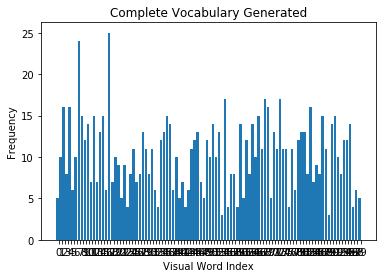

In [99]:

n_clusters = 100
n_vocables = 8
dic = range(n_vocables)

kmeans_ret, kmeans_obj = clusturing(n_clusters, desc_list)
mega_histo = developVocabulary(n_vocables, desc_list, kmeans_ret)
plotHist(mega_histo, n_clusters, None)


#fonction d'application de developvoca.. pour une image (nb cluster variable)
#trouver l'optimal perf / justesse 
#tester par espèce 
# visuel
# montrer des correspondance

In [85]:
print mega_histo

[[26. 17. 71. 14.]
 [22. 18. 72. 16.]
 [40. 26. 39. 23.]]


In [86]:
print desc_list

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [87]:
clf = SVC()

scale = StandardScaler().fit(mega_histo)

mega_histo = standardize(mega_histo, scale)
model_predition = train(clf, mega_histo, dic)


STD not none. External STD supplied
Training SVM
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Train labels [0, 1, 2]
Training completed


In [97]:
#prediction :


def predict(clf, iplist):
    predictions = clf.predict(iplist)
    return predictions

#apply filter and find feature from shift on the new picture
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()
print(automaticImageIndexing.version())
print(automaticImageIndexing.data_directory)

img1, edges1 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085620-Chihuahua\n02085620_7.jpg'
)
image1 = edges1

img2, edges2 = automaticImageIndexing.canny(
    image_path=r'C:\Users\naru_\OneDrive\Documents\openclassroom\P7 traitement image\images\n02085782-Japanese_spaniel\n02085782_2.jpg'
)
image2 = edges2

is_gray = True
image_kp, image_desc = automaticImageIndexing.feature_sift_generation(image2, is_gray)

# print kp
print image_desc.shape


# test_ret =<> return of kmeans nearest clusters for N features
test_ret = kmeans_obj.predict(image_desc)
# print test_ret



# generate vocab for test image
vocab = np.array( [[ 0 for i in range(n_clusters)]])
# locate nearest clusters for each of 
# the visual word (feature) present in the image
# print vocab
for each in test_ret:
    vocab[0][each] += 1

print vocab
# Scale the features
vocab = scale.transform(vocab)

# predict the class of the image
lb = clf.predict(vocab)
# print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
for label in lb:
    print label
    print name_dict[label] 

0.0
Data/
(1438L, 128L)
[[1148  106  144   40]]
2
n02085936-Maltese_dog


In [5]:
mega_histo

array([[-0.77459667,  2.12132034, -1.5       , -1.04257207, -0.87235674,
         0.82502865,  1.25723711,  0.1370735 , -0.37796447,  0.30779351,
         0.16012815, -1.        ,  1.99323179,  2.01752882, -0.94064699,
         1.6081688 ,  1.4123053 , -1.34164079, -0.77459667,  1.12089708,
         1.50755672,  1.        , -1.22068269, -1.63784605, -1.38586973,
         1.66666667,  0.        , -1.41421356, -0.16012815, -0.77459667,
        -0.94387981,  0.56254395,  2.04124145, -0.62994079,  0.77459667,
         1.22474487, -1.        ,  1.50755672, -1.34164079, -0.81649658,
        -1.12857619, -0.75047877,  0.        , -0.53881591,  0.57735027,
        -1.12089708, -0.94387981,  2.41423205,  1.21355975, -0.37796447,
        -0.75047877, -0.53452248, -0.72932496, -0.30151134, -0.30779351,
         0.        ,  2.21359436,  0.        ,  0.13483997, -0.6882472 ,
        -1.33377186,  0.        ,  1.        ,  1.29099445,  1.        ,
         1.29099445, -0.30779351,  1.44115338, -0.0

In [6]:
dic

[0, 1, 2, 3, 4, 5, 6, 7]

Version : 0.1
Data directory : Data/
Computing Features for  n02085620-Chihuahua
apres canny
apres canny
Computing Features for  n02085782-Japanese_spaniel
apres canny
apres canny
Computing Features for  n02085936-Maltese_dog
apres canny
apres canny
Computing Features for  n02086079-Pekinese
apres canny
apres canny
Vocabulary Histogram Generated
Plotting histogram
[11  3 10  3 19 28 18  8  6  9 11 10  9 17  3  7  3 10  8 14  4 14 10 10
 10  2 16 10 18 12 11  9 11  8  5  7  7 21  9  7 18 15  4  7 17  6 12  5
 13 12 10 10 11 17 14 12  8 24 15 12 15 15 12  9  7 16  7  6  6 10  8  9
 11 14  2  8  9 12 13  8 12  7  2  4  6  5  3  8 14 13  8 11  7 15  9 21
 12  7  9  4]


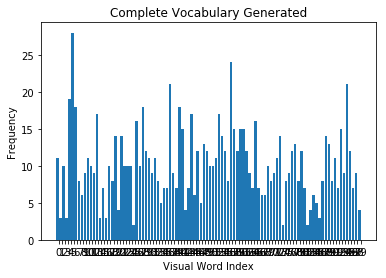

Training completed


In [11]:

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './')

# class de travail
from Python.automaticImageIndexing import AutomaticImageIndexing
automaticImageIndexing = AutomaticImageIndexing()

print(''.join(['Version : ', automaticImageIndexing.version()]))
print(''.join(['Data directory : ', automaticImageIndexing.data_directory]))

automaticImageIndexing.working_directory = 'C:/Users/naru_/OneDrive/Documents/openclassroom/P7 traitement image/'
automaticImageIndexing.annotation_directory = 'annotation/'
automaticImageIndexing.picture_directory = 'images/'

automaticImageIndexing.read_picture_and_shift_feature_generation()

#
automaticImageIndexing.n_clusters = 100
automaticImageIndexing.n_vocables = 8
dic = range(automaticImageIndexing.n_vocables)

automaticImageIndexing.clusturing(automaticImageIndexing.n_clusters)
mega_histo = automaticImageIndexing.developVocabulary(automaticImageIndexing.n_vocables)
automaticImageIndexing.plotHist(mega_histo, automaticImageIndexing.n_clusters, None)

mega_histo = automaticImageIndexing.standardize(mega_histo)
model_predition =automaticImageIndexing.train(mega_histo, dic)

